In [1]:
import numpy as np
import pandas as pd

In [3]:
data_set = pd.read_csv('Flight_Price_Dataset_Q2.csv')
X = data_set.drop(columns='price')
Y = data_set['price']

In [4]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
#Data Filling
data_set.isnull().sum()

departure_time    0
stops             0
arrival_time      0
class             0
duration          0
days_left         0
price             0
dtype: int64

In [6]:
#Data Encoding

x_train['departure_time_encoded'] = x_train['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
x_test['departure_time_encoded'] = x_test['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

x_train['arrival_time_encoded'] = x_train['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
x_test['arrival_time_encoded'] = x_test['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

x_train['stops_encoded'] = x_train['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})
x_test['stops_encoded'] = x_test['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})

x_train['class_encoded'] = x_train['class'].map({'Economy': 1, 'Business': 2})
x_test['class_encoded'] = x_test['class'].map({'Economy': 1, 'Business': 2})


x_train = x_train.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])
x_test = x_test.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])

In [7]:
#Feature Scaling
def normalization(data:pd.DataFrame):
    for col in data.columns:
        min_value = data[col].min()
        max_value = data[col].max()
        norm = lambda x : (x - min_value)/(max_value - min_value)
        data[col] = data[col].map(norm)
    return data

x_train = normalization(x_train)
x_test = normalization(x_test)

In [33]:
from sklearn.metrics import mean_squared_error , r2_score
class Regression:
    def __init__(self, data:pd.DataFrame):
        self.mse_g = list()
        self.r2_g = list()
        if data.iloc[0, 0] != 1:
            self.weight = np.ones(len(data.columns)+1)
        else:
            self.weight = np.ones(len(data.columns))

    def fit(self, x:pd.DataFrame, y:pd.DataFrame, epoch:int):
        m = len(x)
        if x.iloc[0, 0] != 1:
            x.insert(0, 'bias', 1)
        for i in range(epoch):
            gradient = 2/m * x.T.dot(self.predict(x) - y)
            learning_rate = (epoch / 10) / (i + epoch)
            self.weight = self.weight - learning_rate * gradient
            self.mse_g.append(mean_squared_error(y, self.predict(x)))
            self.r2_g.append(r2_score(y, self.predict(x)))

    def predict(self, df:pd.DataFrame):
        if df.iloc[0, 0] != 1:
            df.insert(0, 'bias', 1)
        return np.dot(df, self.weight)

In [34]:
reg = Regression(x_train)

reg.fit(x_train, y_train, 200)
reg.weight

bias                       4076.769731
duration                   4956.421823
days_left                 -5721.491200
departure_time_encoded     -356.672306
arrival_time_encoded       1415.017409
stops_encoded              8334.835238
class_encoded             45576.293748
dtype: float64

In [35]:
#mean square error
y_pred_test = reg.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

51976837.864662565

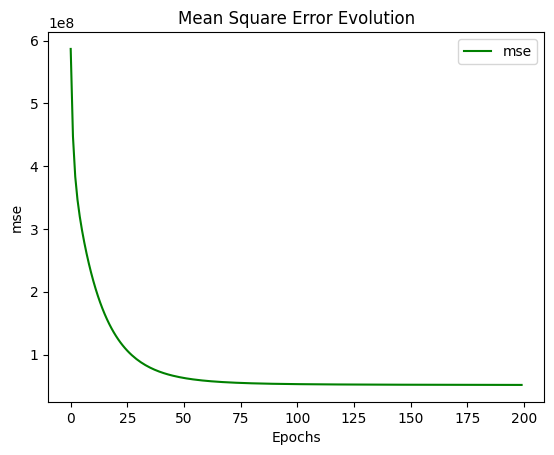

In [36]:
#mse plot
import matplotlib.pyplot as plt

epochs = range(200)
plt.plot(epochs, reg.mse_g, 'g', label='mse')
plt.title('Mean Square Error Evolution')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()